In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#reading data
purchase=pd.read_csv("QVI_purchase_behaviour.csv");
purchase.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

In [ ]:
#reading data
transaction=pd.read_excel("/content/QVI_transaction_data.xlsx")
transaction.head(100)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0   43390          1            1000       1         5   
1   43599          1            1307     348        66   
2   43605          1            1343     383        61   
3   43329          2            2373     974        69   
4   43330          2            2426    1038       108   
..    ...        ...             ...     ...       ...   
95  43600        125          125251  129302        36   
96  43326        128          128148  131503        51   
97  43328        128          128231  132121        28   
98  43330        128          128231  132122        33   
99  43600        129          129134  133032        92   

                                   PROD_NAME  PROD_QTY  TOT_SALES  
0     Natural Chip        Compny SeaSalt175g         2        6.0  
1                   CCs Nacho Cheese    175g         3        6.3  
2     Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3     Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4   Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
..                                       ...       ...        ...  
95                        Kettle Chilli 175g         1        5.4  
96                  Doritos Mexicana    170g         1        4.4  
97      Thins Potato Chips  Hot & Spicy 175g         1        3.3  
98  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g         1        3.8  
99          WW Crinkle Cut      Chicken 175g         2        3.4  

[100 rows x 8 columns]

In [ ]:
transaction.describe()

DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.000000       2.000000       9.200000  
max       114.000000     200.000000     650.000000

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [ ]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

# Data Cleaning and Feature Engineering

In [ ]:
#transforming date column
transaction["DATE"]=pd.to_datetime(transaction["DATE"], origin = "1899-12-30",unit="D")
transaction["PROD_NAME"].describe()

count                                     246742
unique                                       105
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [ ]:
transaction.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [ ]:
transaction['Pack Size'] = transaction['PROD_NAME'].str.extract(r'(\d+)g')
transaction['Brand'] = transaction['PROD_NAME'].str.split().str[0]


In [ ]:
# Assuming `transaction` is your DataFrame
word_counts = transaction["PROD_NAME"].str.split(expand=True).stack().value_counts()

# Print the most common words and their frequencies
print(word_counts)


175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 220, dtype: int64


In [ ]:
import collections
import pandas as pd

# Assuming `transaction` is your DataFrame
word_freq = collections.Counter(word for prod_name in transaction["PROD_NAME"] for word in prod_name.split())

# Convert the Counter to a DataFrame for easier manipulation
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])


# Remove words that start with digits or '&'
filtered_freq = word_freq_df[~word_freq_df["Word"].str.match(r'^\d|&')]

# Get the most frequent words
most_common_words = filtered_freq.sort_values(by="Frequency", ascending=False).head()

print(most_common_words)


      Word  Frequency
11   Chips      49770
16  Kettle      41288
8   Smiths      28860
29    Salt      27976
6   Cheese      27890


In [ ]:
#dropping salsa items
transaction.drop(transaction[[("Salsa" in s)  for s in transaction['PROD_NAME']]].index,inplace=True)
transaction[[("Salsa" in s)  for s in transaction['PROD_NAME']]]

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES]
Index: []

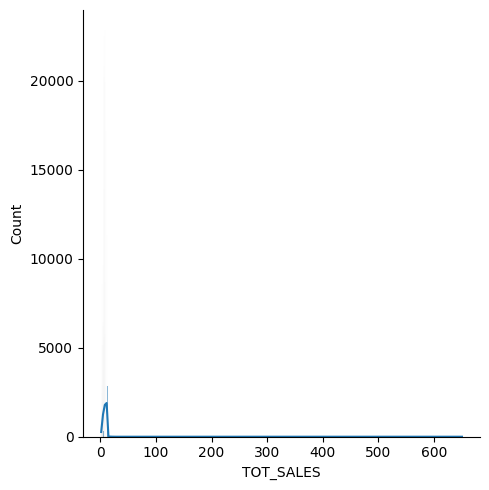

In [ ]:
sns.displot(transaction.TOT_SALES , kde = True)

<ipython-input-10-652f2e816788>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction.TOT_SALES , kde = True)


<Axes: xlabel='TOT_SALES', ylabel='Density'>

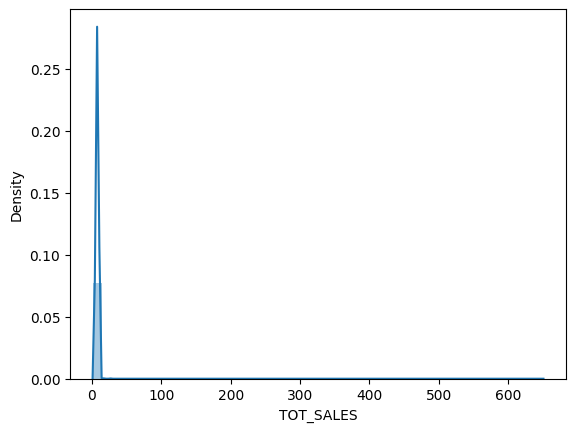

In [ ]:
sns.distplot(transaction.TOT_SALES , kde = True)

In [ ]:
td= transaction.select_dtypes(['float', 'int'])
td.head()

STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES
0          1            1000       1         5         2        6.0
1          1            1307     348        66         3        6.3
2          1            1343     383        61         2        2.9
3          2            2373     974        69         5       15.0
4          2            2426    1038       108         3       13.8

In [ ]:
a = td[td['TOT_SALES'] < 8.000]

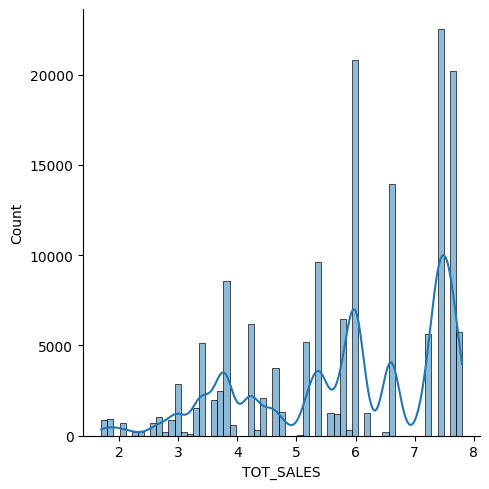

In [ ]:
sns.displot(a.TOT_SALES, kde = True)

<Axes: >

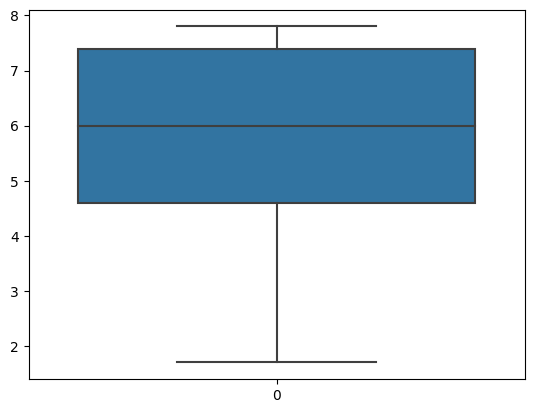

In [ ]:
sns.boxplot(a.TOT_SALES)

In [ ]:
transaction.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

# Removing Anomalies from datasets



In [ ]:
transaction['PROD_QTY'].describe()
transaction[transaction['PROD_QTY']>5]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0

In [ ]:
#transaction["DATE"]=pd.to_datetime(transaction["DATE"], origin = "1899-12-30",unit="D")
ts=transaction.groupby('DATE').count()
ts.head()

STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  \
DATE                                                                           
2018-07-01        663             663     663       663        663       663   
2018-07-02        650             650     650       650        650       650   
2018-07-03        674             674     674       674        674       674   
2018-07-04        669             669     669       669        669       669   
2018-07-05        660             660     660       660        660       660   

            TOT_SALES  
DATE                   
2018-07-01        663  
2018-07-02        650  
2018-07-03        674  
2018-07-04        669  
2018-07-05        660

In [ ]:
# Create a complete date range
complete_date_range = pd.date_range(start=ts.index.min(),end=ts.index.max(), freq='D')

# Reindex the grouped data with the complete date range
ts_reindexed = ts.reindex(complete_date_range)

# Find missing dates
missing_dates = ts_reindexed[ts_reindexed.isna().any(axis=1)].index
print(missing_dates)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


In [ ]:
ts.loc['2018-12-25'] = np.nan
ts[ts.index=='2018-12-25']

STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  \
DATE                                                                           
2018-12-25        NaN             NaN     NaN       NaN        NaN       NaN   

            TOT_SALES  
DATE                   
2018-12-25        NaN

In [ ]:
# Adding features
def fun(s):
    a=[]
    for i in s:
        if i in ['0','1','2','3','4','5','6','7','8','9']:
            a.append(i)
    return int("".join(a))




In [ ]:
transaction['PACKAGE_SIZE'] = transaction['PROD_NAME'].apply(fun)
transaction.head(5)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACKAGE_SIZE  
0    Natural Chip        Compny SeaSalt175g         2        6.0           175  
1                  CCs Nacho Cheese    175g         3        6.3           175  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9           170  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0           175  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8           150

In [ ]:
transaction['BRAND'] = [s.split()[0] for s in transaction['PROD_NAME']]
transaction['BRAND']=[s.split()[0] for s in transaction['PROD_NAME']]
transaction['BRAND'].replace('Dorito','Doritos',inplace=True)
transaction['BRAND'].replace('Infzns','Infuzions',inplace=True)
transaction['BRAND'].replace('Smith','Smiths',inplace=True)
transaction['BRAND'].replace('Snbts','Sunbites',inplace=True)
transaction['BRAND'].replace('Red','RRD',inplace=True)
transaction['BRAND'].replace('Old','Old El Paso',inplace=True)
transaction['BRAND'].replace('WW','Woolworths',inplace=True)
transaction['BRAND'].replace('Natural','NCC',inplace=True)


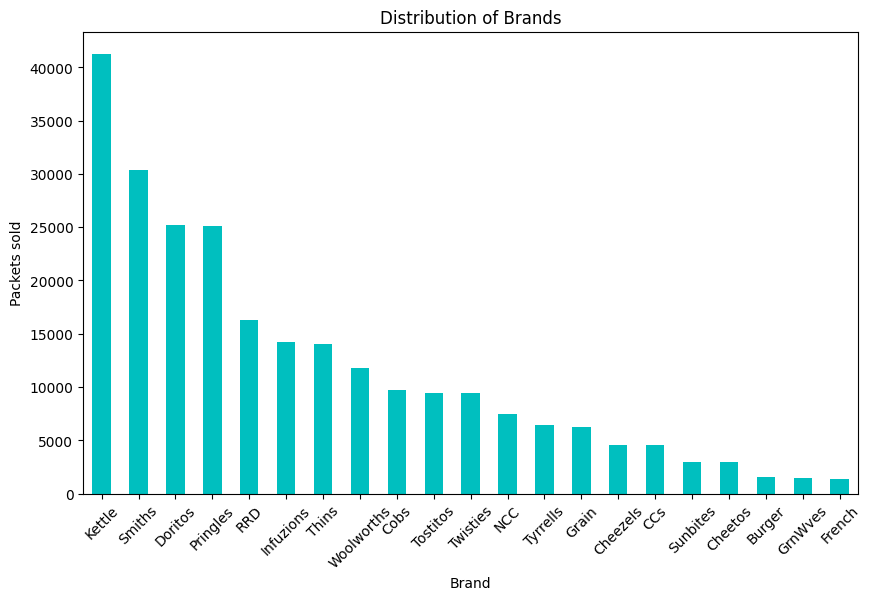

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for brands
plt.figure(figsize=(10, 6))
transaction['BRAND'].value_counts().plot(kind='bar', color='c')
plt.xlabel('Brand')
plt.ylabel('Packets sold')
plt.title('Distribution of Brands')
plt.xticks(rotation=45)
plt.show()


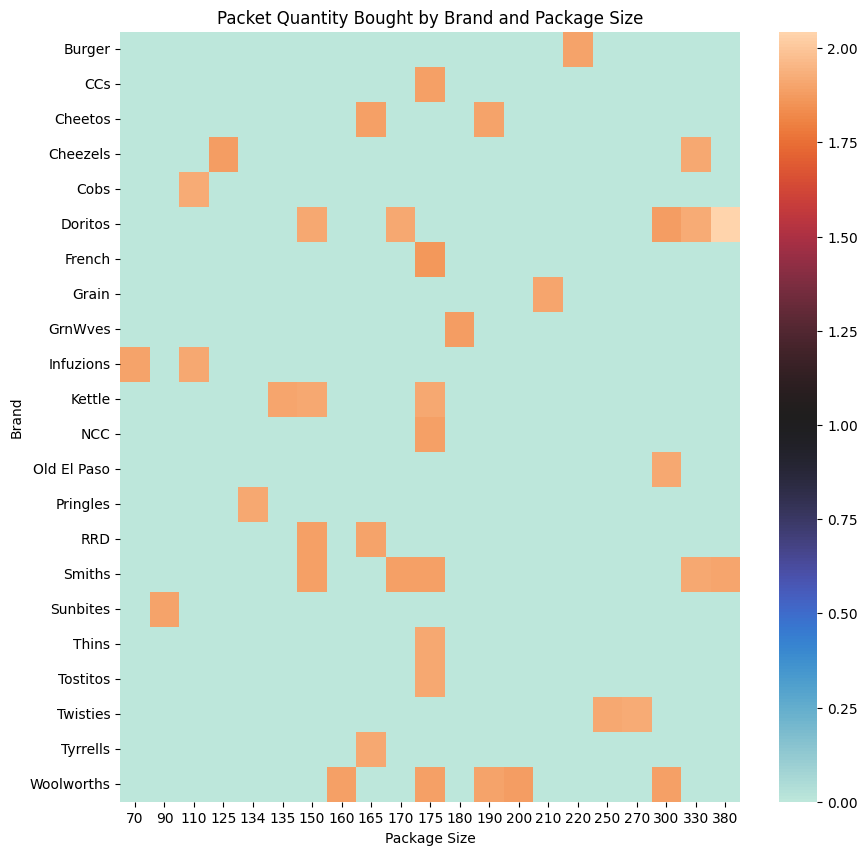

In [ ]:
plt.figure(figsize=(10, 10))

pivot_table = pd.pivot_table(data=transaction, index='BRAND', columns='PACKAGE_SIZE', values='PROD_QTY').fillna(0)

sns.heatmap(pivot_table, cmap='icefire')


plt.xlabel('Package Size')
plt.ylabel('Brand')
plt.title('Packet Quantity Bought by Brand and Package Size')

plt.show()


Text(0.5, 1.0, 'Total Transactions per Packet Size')

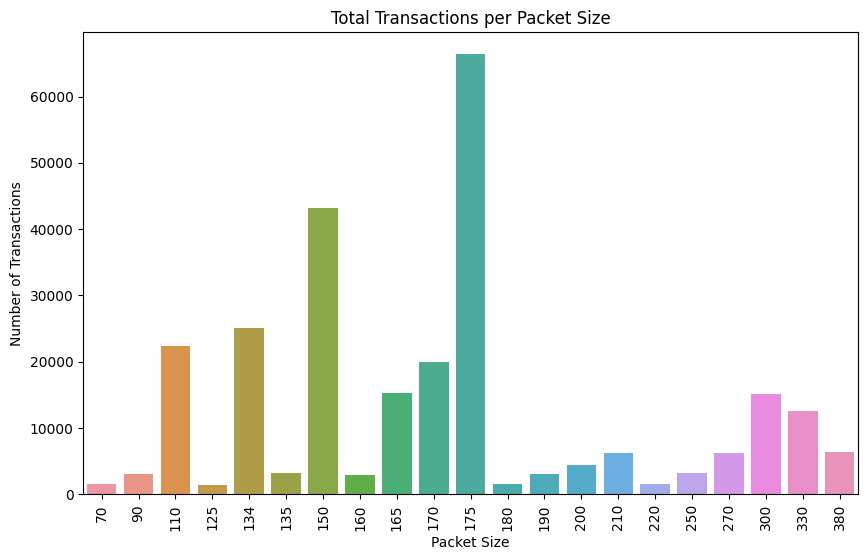

In [ ]:
plt.figure(figsize=(10, 6))
agg_packet_size = transaction.groupby('PACKAGE_SIZE')['TXN_ID'].count().reset_index()
sns.barplot(x='PACKAGE_SIZE', y='TXN_ID', data=agg_packet_size)
plt.xticks(rotation=90)
plt.xlabel('Packet Size')
plt.ylabel('Number of Transactions')
plt.title('Total Transactions per Packet Size')


<ipython-input-33-4d2b74b99148>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = transaction.corr()


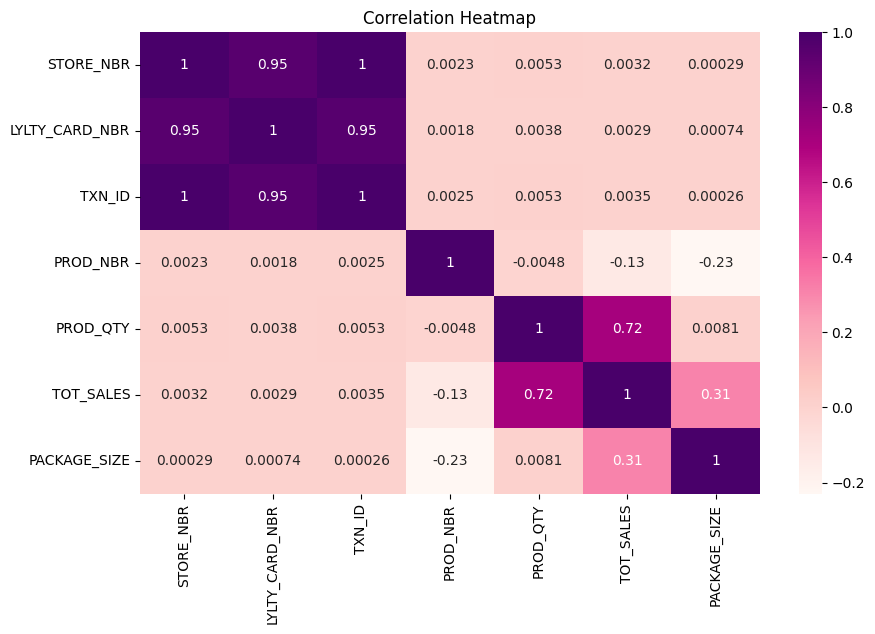

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix
correlation_matrix = transaction.corr()

# Seting up the figure and axes
plt.figure(figsize=(10, 6))

# Creating the correlation heatmap using sns.heatmap()
sns.heatmap(correlation_matrix, cmap='RdPu', annot=True)

plt.title('Correlation Heatmap')

plt.show()


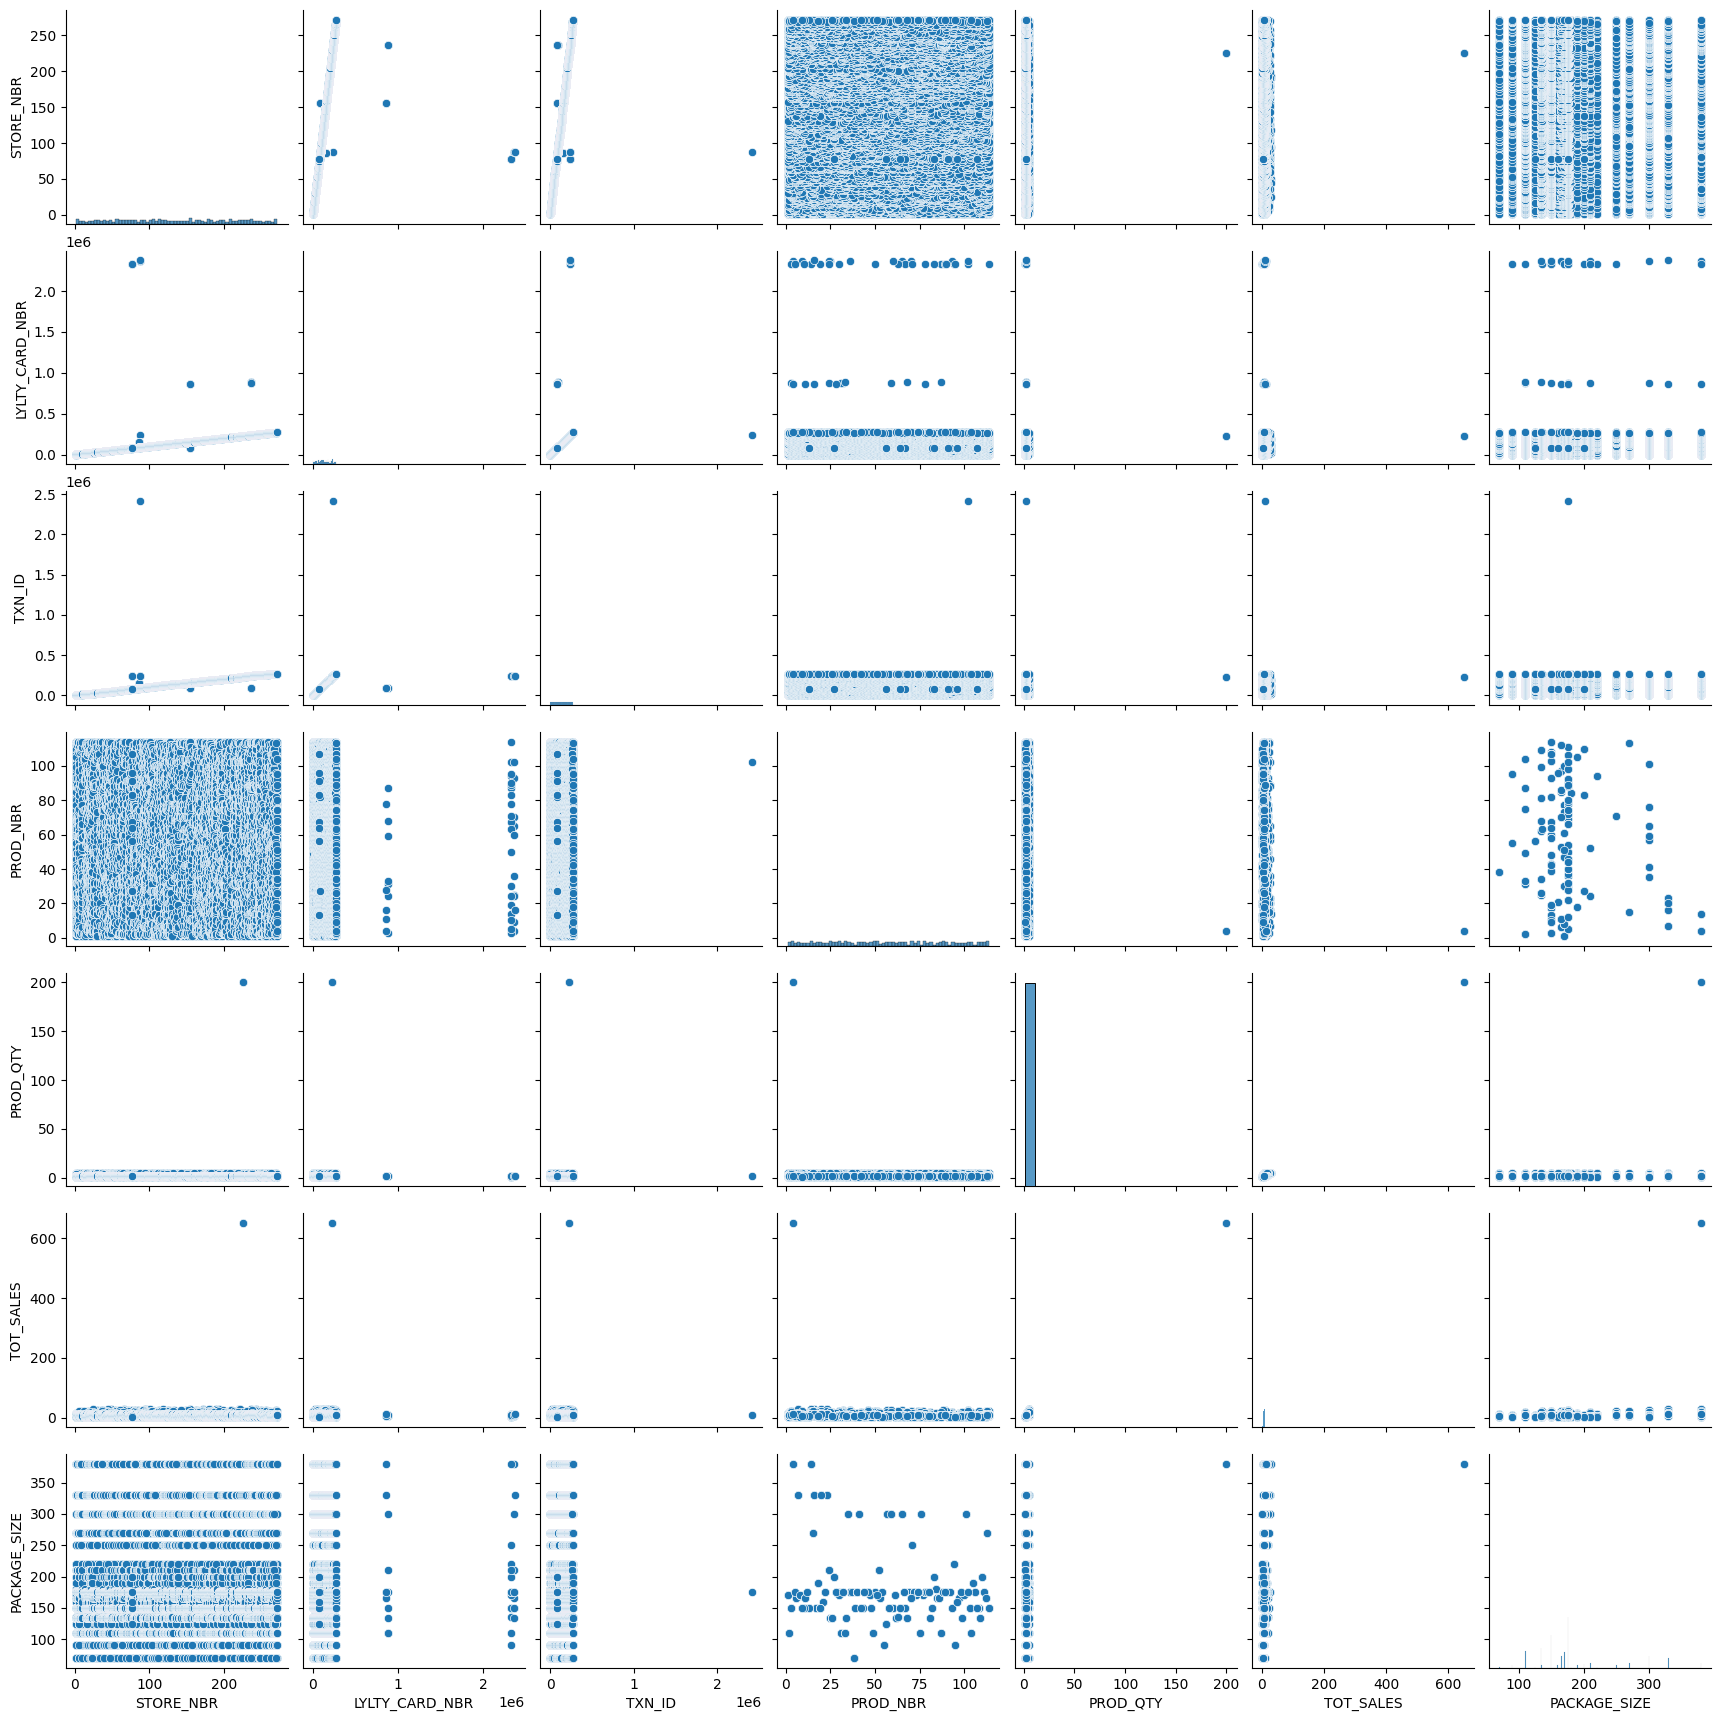

In [ ]:
#pair plot
sns.pairplot(data=transaction[transaction.columns.drop('PROD_NAME')])

#Purchasing data


In [ ]:
#reading purchasing data
purchase=pd.read_csv("QVI_purchase_behaviour.csv");
purchase.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

In [ ]:
purchase['LYLTY_CARD_NBR'].nunique()

72637

In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# checking for missing values
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
purchase.describe(include='all')


LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN

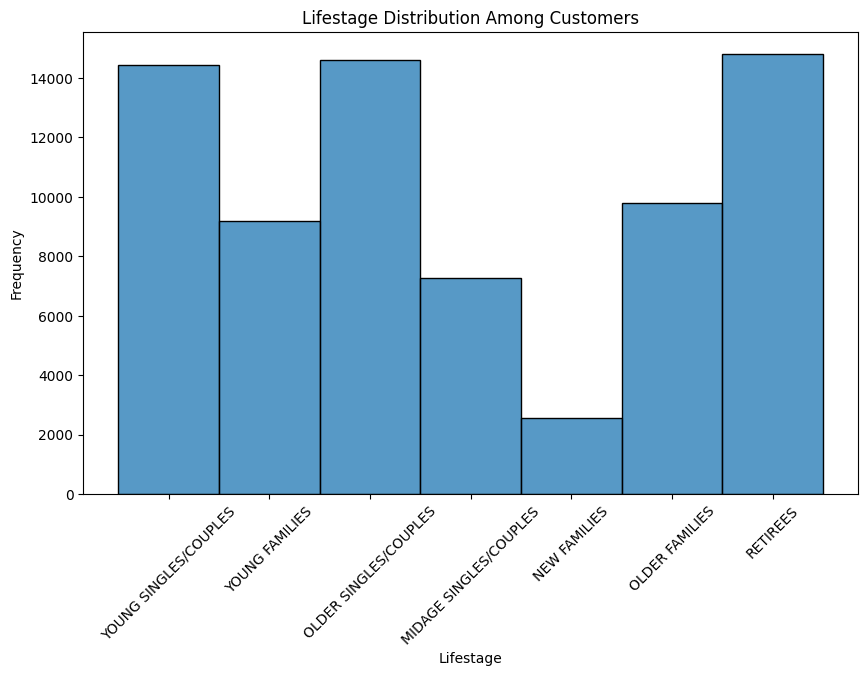

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a histogram for the 'LIFESTAGE' column
plt.figure(figsize=(10, 6))
sns.histplot(data=purchase, x='LIFESTAGE', bins=10)
plt.xlabel('Lifestage')
plt.ylabel('Frequency')
plt.title('Lifestage Distribution Among Customers')
plt.xticks(rotation=45)
plt.show()


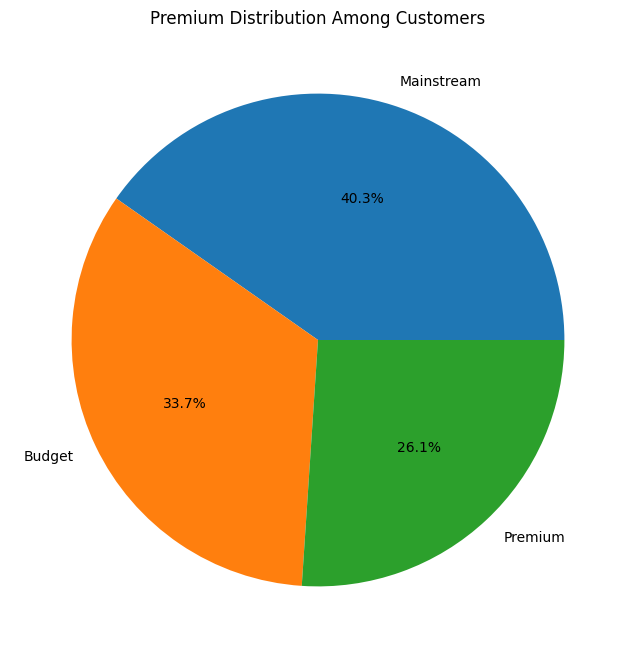

In [ ]:
# Pie chart for 'PREMIUM_CUSTOMER' distribution
plt.figure(figsize=(8, 8))
purchase['PREMIUM_CUSTOMER'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Premium Distribution Among Customers')
plt.ylabel('')
plt.show()


In [ ]:
import plotly.graph_objs as go

# Lifestage Distribution Histogram
lifestage_histogram = go.Histogram(x=purchase['LIFESTAGE'], nbinsx=20)
layout = go.Layout(title='Lifestage Distribution')
fig1 = go.Figure(data=[lifestage_histogram], layout=layout)
fig1.show()



In [ ]:
# Premium Customer Distribution Histogram
premium_customer_histogram = go.Histogram(x=purchase['PREMIUM_CUSTOMER'])
layout = go.Layout(title='Premium Customer Distribution')
fig2 = go.Figure(data=[premium_customer_histogram], layout=layout)
fig2.show()


#Merging Transaction and Purchasing Datasets


In [ ]:
merged_data=pd.merge(transaction,purchase,on='LYLTY_CARD_NBR')
merged_data.head(10)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2018-11-10          1            1307     346        96   
3 2019-03-09          1            1307     347        54   
4 2019-05-20          1            1343     383        61   
5 2018-08-17          2            2373     974        69   
6 2018-08-18          2            2426    1038       108   
7 2019-05-16          4            4149    3333        16   
8 2018-07-06          4            4149    3330        46   
9 2018-07-18          4            4149    3331       112   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2            WW Original Stacked Chips 160g         2        3.8   
3                         CCs Original 175g         1        2.1   
4    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
5    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
6  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
7  Smiths Crinkle Chips Salt & Vinegar 330g         1        5.7   
8                      Kettle Original 175g         2       10.8   
9    Tyrrells Crisps     Ched & Chives 165g         2        8.4   

   PACKAGE_SIZE       BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0           175         NCC   YOUNG SINGLES/COUPLES          Premium  
1           175         CCs  MIDAGE SINGLES/COUPLES           Budget  
2           160  Woolworths  MIDAGE SINGLES/COUPLES           Budget  
3           175         CCs  MIDAGE SINGLES/COUPLES           Budget  
4           170      Smiths  MIDAGE SINGLES/COUPLES           Budget  
5           175      Smiths  MIDAGE SINGLES/COUPLES           Budget  
6           150      Kettle  MIDAGE SINGLES/COUPLES           Budget  
7           330      Smiths  MIDAGE SINGLES/COUPLES           Budget  
8           175      Kettle  MIDAGE SINGLES/COUPLES           Budget  
9           165    Tyrrells  MIDAGE SINGLES/COUPLES           Budget

In [ ]:
merged_data=pd.merge(transaction,purchase,on='LYLTY_CARD_NBR')
merged_data.head(10)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2018-11-10          1            1307     346        96   
3 2019-03-09          1            1307     347        54   
4 2019-05-20          1            1343     383        61   
5 2018-08-17          2            2373     974        69   
6 2018-08-18          2            2426    1038       108   
7 2019-05-19          4            4074    2982        57   
8 2018-08-06          4            4074    2978        70   
9 2018-08-09          4            4074    2979        60   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2            WW Original Stacked Chips 160g         2        3.8   
3                         CCs Original 175g         1        2.1   
4    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
5    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
6  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
7  Old El Paso Salsa   Dip Tomato Mild 300g         1        5.1   
8   Tyrrells Crisps     Lightly Salted 165g         2        8.4   
9      Kettle Tortilla ChpsFeta&Garlic 150g         2        9.2   

   PACKAGE_SIZE        BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0           175          NCC   YOUNG SINGLES/COUPLES          Premium  
1           175          CCs  MIDAGE SINGLES/COUPLES           Budget  
2           160   Woolworths  MIDAGE SINGLES/COUPLES           Budget  
3           175          CCs  MIDAGE SINGLES/COUPLES           Budget  
4           170       Smiths  MIDAGE SINGLES/COUPLES           Budget  
5           175       Smiths  MIDAGE SINGLES/COUPLES           Budget  
6           150       Kettle  MIDAGE SINGLES/COUPLES           Budget  
7           300  Old El Paso  MIDAGE SINGLES/COUPLES           Budget  
8           165     Tyrrells  MIDAGE SINGLES/COUPLES           Budget  
9           150       Kettle  MIDAGE SINGLES/COUPLES           Budget

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 246741
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246742 non-null  datetime64[ns]
 1   STORE_NBR         246742 non-null  int64         
 2   LYLTY_CARD_NBR    246742 non-null  int64         
 3   TXN_ID            246742 non-null  int64         
 4   PROD_NBR          246742 non-null  int64         
 5   PROD_NAME         246742 non-null  object        
 6   PROD_QTY          246742 non-null  int64         
 7   TOT_SALES         246742 non-null  float64       
 8   PACKAGE_SIZE      246742 non-null  int64         
 9   BRAND             246742 non-null  object        
 10  LIFESTAGE         246742 non-null  object        
 11  PREMIUM_CUSTOMER  246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


In [ ]:
merged_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACKAGE_SIZE        0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
missing_rows = merged_data[merged_data.isna().any(axis=1)]
missing_rows.head(10)

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACKAGE_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []

In [ ]:
merged_data.to_csv('Final.csv')

In [ ]:
# Grouping by 'PREMIUM_CUSTOMER' and calculating the sum of 'TOT_SALES' for each group
sales_by_customer = merged_data[['TOT_SALES', 'PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').sum().sort_values('TOT_SALES', ascending=False)


In [ ]:
merged_data[['TOT_SALES','PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').sum().sort_values('TOT_SALES',ascending=False)


TOT_SALES
PREMIUM_CUSTOMER           
Mainstream        700865.40
Budget            631406.85
Premium           474205.45

In [ ]:
#Who spends the most on chips (total sales), describing customers by lifestage and
#how premium their general purchasing behaviour is
a=merged_data[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()
a.sort_values('TOT_SALES',ascending=False)

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          168363.25
Mainstream       YOUNG SINGLES/COUPLES   157621.60
                 RETIREES                155677.05
Budget           YOUNG FAMILIES          139345.85
                 OLDER SINGLES/COUPLES   136769.80
Mainstream       OLDER SINGLES/COUPLES   133393.80
Premium          OLDER SINGLES/COUPLES   132263.15
Budget           RETIREES                113147.80
Mainstream       OLDER FAMILIES          103445.55
Premium          RETIREES                 97646.05
Mainstream       YOUNG FAMILIES           92788.75
                 MIDAGE SINGLES/COUPLES   90803.85
Premium          YOUNG FAMILIES           84025.50
                 OLDER FAMILIES           81958.40
Budget           YOUNG SINGLES/COUPLES    61141.60
Premium          MIDAGE SINGLES/COUPLES   58432.65
                 YOUNG SINGLES/COUPLES    41642.10
Budget           MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
Mainstream       NEW FAMILIES             17013.90
Premium          NEW FAMILIES             11491.10

In [ ]:
#Who spends the most on chips (total sales), describing customers by lifestage and
#how premium their general purchasing behaviour is
a=merged_data[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()
a.sort_values('TOT_SALES',ascending=False)

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          156863.75
Mainstream       YOUNG SINGLES/COUPLES   147582.20
                 RETIREES                145168.95
Budget           YOUNG FAMILIES          129717.95
                 OLDER SINGLES/COUPLES   127833.60
Mainstream       OLDER SINGLES/COUPLES   124648.50
Premium          OLDER SINGLES/COUPLES   123537.55
Budget           RETIREES                105916.30
Mainstream       OLDER FAMILIES           96413.55
Premium          RETIREES                 91296.65
Mainstream       YOUNG FAMILIES           86338.25
                 MIDAGE SINGLES/COUPLES   84734.25
Premium          YOUNG FAMILIES           78571.70
                 OLDER FAMILIES           76542.60
Budget           YOUNG SINGLES/COUPLES    57122.10
Premium          MIDAGE SINGLES/COUPLES   54443.85
                 YOUNG SINGLES/COUPLES    39052.30
Budget           MIDAGE SINGLES/COUPLES   33345.70
                 NEW FAMILIES             20607.45
Mainstream       NEW FAMILIES             15979.70
Premium          NEW FAMILIES             10760.80

<Axes: xlabel='LIFESTAGE', ylabel='TOT_SALES'>

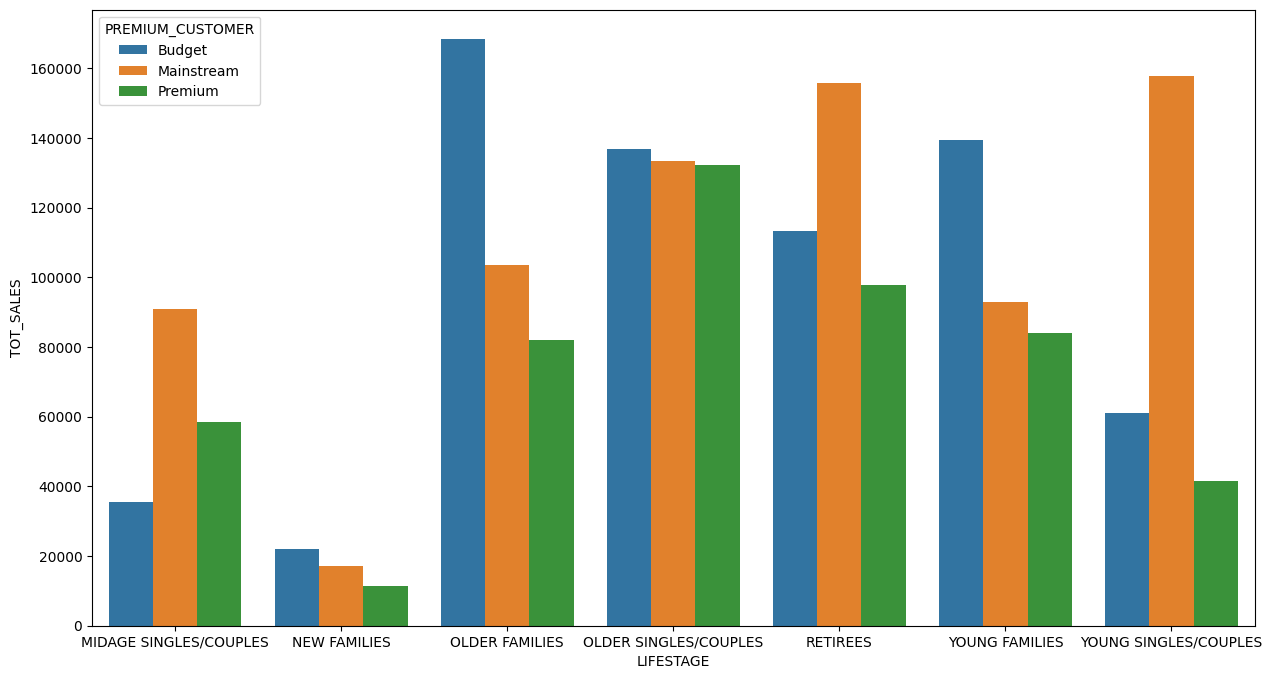

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=a.reset_index()['TOT_SALES'],x=a.reset_index()['LIFESTAGE'],hue=a.reset_index()['PREMIUM_CUSTOMER'])

In [ ]:
# How many customers are in each segment
b=purchase.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).count()
b.columns=['CUSTOMER_COUNT']
b.sort_values('CUSTOMER_COUNT',ascending=False)

CUSTOMER_COUNT
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES             8088
                 RETIREES                          6479
                 OLDER SINGLES/COUPLES             4930
Budget           OLDER SINGLES/COUPLES             4929
Premium          OLDER SINGLES/COUPLES             4750
Budget           OLDER FAMILIES                    4675
                 RETIREES                          4454
                 YOUNG FAMILIES                    4017
Premium          RETIREES                          3872
Budget           YOUNG SINGLES/COUPLES             3779
Mainstream       MIDAGE SINGLES/COUPLES            3340
                 OLDER FAMILIES                    2831
                 YOUNG FAMILIES                    2728
Premium          YOUNG SINGLES/COUPLES             2574
                 YOUNG FAMILIES                    2433
                 MIDAGE SINGLES/COUPLES            2431
                 OLDER FAMILIES                    2274
Budget           MIDAGE SINGLES/COUPLES            1504
                 NEW FAMILIES                      1112
Mainstream       NEW FAMILIES                       849
Premium          NEW FAMILIES                       588

This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.
Higher sales may also be driven by more units of chips being bought per customer.

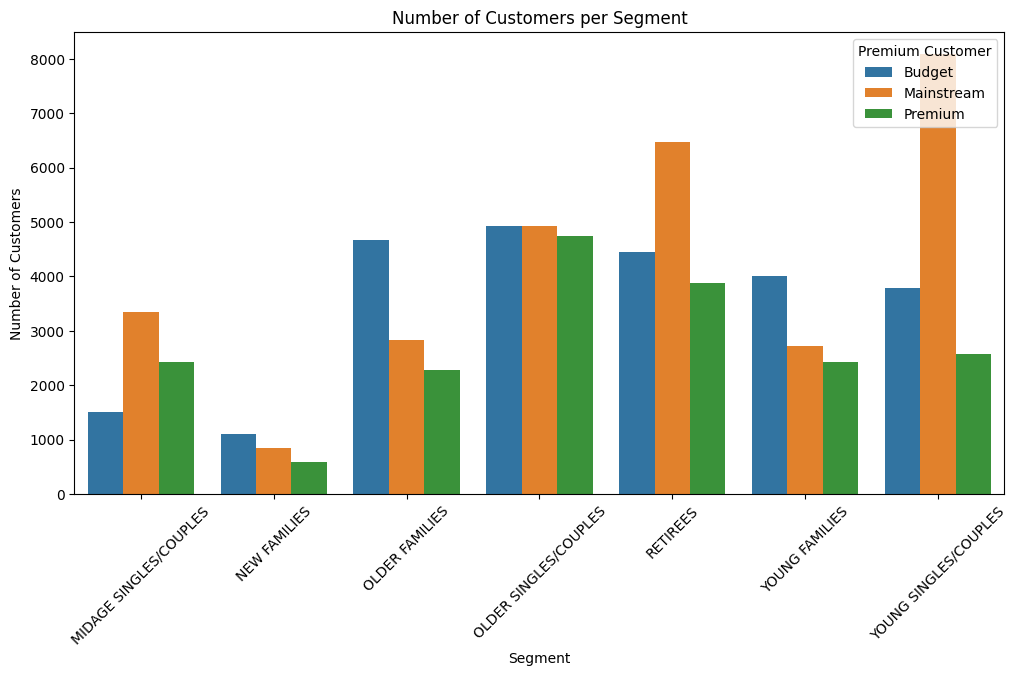

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for the number of customers per segment using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=b.reset_index()['LIFESTAGE'], y=b.reset_index()['CUSTOMER_COUNT'], hue=b.reset_index()['PREMIUM_CUSTOMER'])
plt.title('Number of Customers per Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.show()


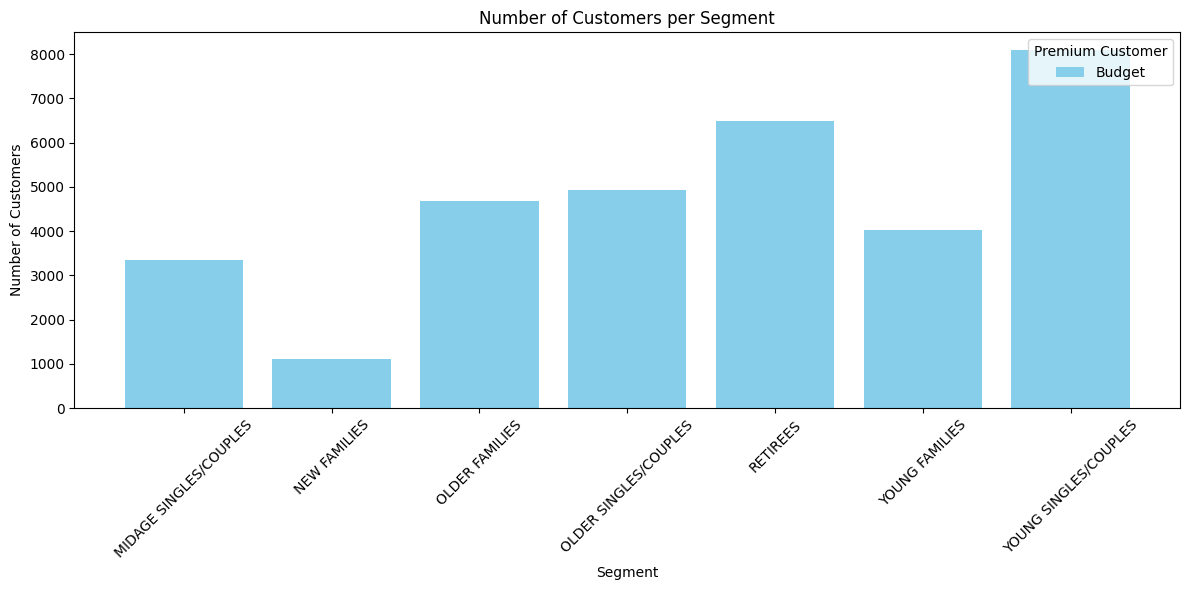

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot for the number of customers per segment using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(x=b.reset_index()['LIFESTAGE'], height=b.reset_index()['CUSTOMER_COUNT'], color='skyblue', label='Budget')
plt.title('Number of Customers per Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
#How many chips are bought per customer by segment
c=merged_data[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count()
c.sort_values('TOT_SALES',ascending=False).head(5)

TOT_SALES
LIFESTAGE             PREMIUM_CUSTOMER           
OLDER FAMILIES        Budget                21514
RETIREES              Mainstream            19970
YOUNG SINGLES/COUPLES Mainstream            19544
YOUNG FAMILIES        Budget                17763
OLDER SINGLES/COUPLES Budget                17172

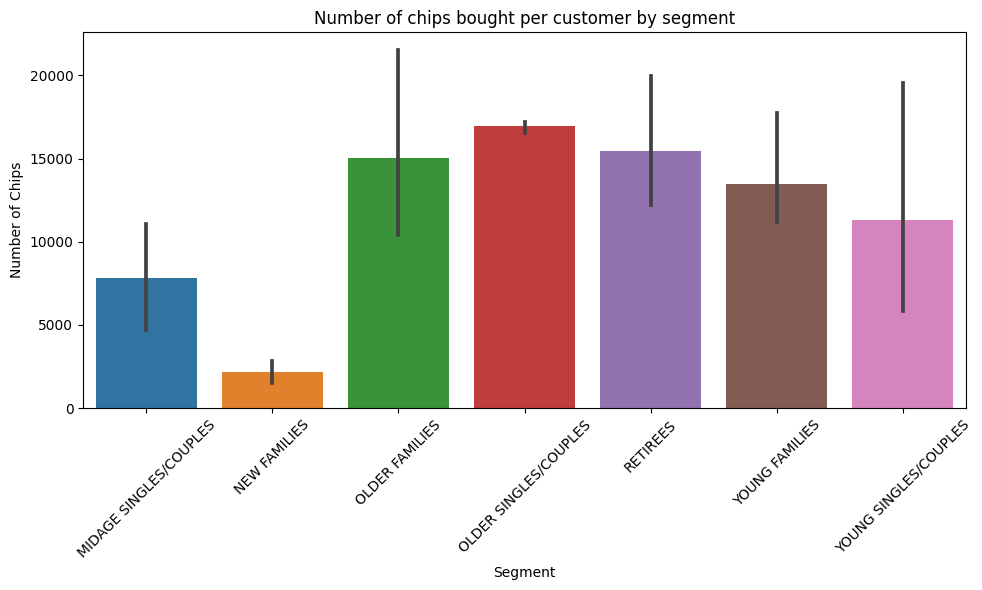

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'c' is your DataFrame
c_reset = c.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=c_reset['LIFESTAGE'], y=c_reset['TOT_SALES'])
plt.title("Number of chips bought per customer by segment")
plt.xlabel("Segment")
plt.ylabel("Number of Chips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
#  The customer's total spend over the period
# to understand what proportion of their grocery spend is on chips
transaction_1=pd.read_excel("/content/QVI_transaction_data.xlsx")
totsalespercust=transaction_1[['LYLTY_CARD_NBR','TOT_SALES']].groupby(['LYLTY_CARD_NBR']).sum().reset_index()
ratio=transaction_1[['LYLTY_CARD_NBR','TOT_SALES']].merge(totsalespercust,on='LYLTY_CARD_NBR').rename(columns={'TOT_SALES_x':'TRAN_SALE','TOT_SALES_y':'CUST_TOT_SALE'})
ratio['RATIO']=ratio['TRAN_SALE']/ratio['CUST_TOT_SALE']
ratio.sort_values('RATIO')


LYLTY_CARD_NBR  TRAN_SALE  CUST_TOT_SALE     RATIO
187065          152094        1.9          112.1  0.016949
35686           180180        1.5           81.3  0.018450
117638           33131        1.5           80.9  0.018541
81069            48155        1.9          100.7  0.018868
187454          168140        1.7           86.5  0.019653
...                ...        ...            ...       ...
176078           50201        1.7            1.7  1.000000
176077           50160        7.6            7.6  1.000000
176072           50074        1.9            1.9  1.000000
175814           41220        5.7            5.7  1.000000
264835          272380        8.8            8.8  1.000000

[264836 rows x 4 columns]

In [ ]:
import pandas as pd
#  The customer's total spend over the period
# to understand what proportion of their grocery spend is on chips
transaction_1=pd.read_excel("/content/QVI_transaction_data.xlsx")
totsalespercust=transaction_1[['LYLTY_CARD_NBR','TOT_SALES']].groupby(['LYLTY_CARD_NBR']).sum().reset_index()
ratio=transaction_1[['LYLTY_CARD_NBR','TOT_SALES']].merge(totsalespercust,on='LYLTY_CARD_NBR').rename(columns={'TOT_SALES_x':'TRAN_SALE','TOT_SALES_y':'CUST_TOT_SALE'})
ratio['RATIO']=ratio['TRAN_SALE']/ratio['CUST_TOT_SALE']
ratio.sort_values('RATIO')

LYLTY_CARD_NBR  TRAN_SALE  CUST_TOT_SALE     RATIO
187065          152094        1.9          112.1  0.016949
35686           180180        1.5           81.3  0.018450
117638           33131        1.5           80.9  0.018541
81069            48155        1.9          100.7  0.018868
187454          168140        1.7           86.5  0.019653
...                ...        ...            ...       ...
176078           50201        1.7            1.7  1.000000
176077           50160        7.6            7.6  1.000000
176072           50074        1.9            1.9  1.000000
175814           41220        5.7            5.7  1.000000
264835          272380        8.8            8.8  1.000000

[264836 rows x 4 columns]

In [ ]:
# What's the average chip price by customer segment
merged_data['CHIP_PRICE']=merged_data['TOT_SALES']/merged_data['PROD_QTY']
d=merged_data[['LIFESTAGE','PREMIUM_CUSTOMER','CHIP_PRICE']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).mean()
d.sort_values("CHIP_PRICE",ascending=False)

CHIP_PRICE
PREMIUM_CUSTOMER LIFESTAGE                         
Mainstream       YOUNG SINGLES/COUPLES     4.065642
                 MIDAGE SINGLES/COUPLES    3.994241
Budget           RETIREES                  3.924404
Premium          RETIREES                  3.920942
Budget           NEW FAMILIES              3.917688
Mainstream       NEW FAMILIES              3.916133
Premium          OLDER SINGLES/COUPLES     3.893182
Budget           OLDER SINGLES/COUPLES     3.882096
Premium          NEW FAMILIES              3.872110
Mainstream       RETIREES                  3.844294
                 OLDER SINGLES/COUPLES     3.814665
Premium          MIDAGE SINGLES/COUPLES    3.770698
                 YOUNG FAMILIES            3.762150
Budget           YOUNG FAMILIES            3.760737
                 OLDER FAMILIES            3.745340
                 MIDAGE SINGLES/COUPLES    3.743328
Mainstream       OLDER FAMILIES            3.737077
                 YOUNG FAMILIES            3.724533
Premium          OLDER FAMILIES            3.716910
                 YOUNG SINGLES/COUPLES     3.665414
Budget           YOUNG SINGLES/COUPLES     3.657366

In [ ]:
#  Proportion of customers in each customer segment overall to compare against the
# mix of customers who purchase chips
e= merged_data[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).count()
e["TOT_SALES"]/(e['TOT_SALES'].sum())

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    0.019012
                  NEW FAMILIES              0.011445
                  OLDER FAMILIES            0.087192
                  OLDER SINGLES/COUPLES     0.069595
                  RETIREES                  0.057651
                  YOUNG FAMILIES            0.071990
                  YOUNG SINGLES/COUPLES     0.034745
Mainstream        MIDAGE SINGLES/COUPLES    0.044966
                  NEW FAMILIES              0.008855
                  OLDER FAMILIES            0.053663
                  OLDER SINGLES/COUPLES     0.069145
                  RETIREES                  0.080935
                  YOUNG FAMILIES            0.048419
                  YOUNG SINGLES/COUPLES     0.079208
Premium           MIDAGE SINGLES/COUPLES    0.030850
                  NEW FAMILIES              0.006031
                  OLDER FAMILIES            0.042170
                  OLDER SINGLES/COUPLES     0.067115
     

# t-test

In [ ]:
from scipy import stats
#Mainstream vs premium
stats.ttest_ind([4.065642,3.994241],[3.770698,3.665414])

Ttest_indResult(statistic=4.903408005498769, pvalue=0.039164352682153285)

In [ ]:
#Mainstream vs budget
stats.ttest_ind([4.065642,3.994241],[3.657366,3.743328])

Ttest_indResult(statistic=5.898899732826305, pvalue=0.027555775534860754)

**The t-test results in a p-value of 0.03 and 0.02 , i.e. the unit price for mainstream,young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.**


**Now we are focussing on the mainstream, young and mid-age singles and couples brands that these two customer segments prefer more than others**

In [ ]:
midage=merged_data[(merged_data['PREMIUM_CUSTOMER']=='Mainstream') & (merged_data['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
young=merged_data[(merged_data['PREMIUM_CUSTOMER']=='Mainstream') & (merged_data['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
print(f"MIDAGE SINGLES/COUPLES\n{midage['BRAND'].value_counts().head(5)}")
print(f"YOUNG SINGLES/COUPLES\n{young['BRAND'].value_counts().head(5)}")

MIDAGE SINGLES/COUPLES
Kettle       2136
Smiths       1276
Doritos      1210
Pringles     1159
Infuzions     679
Name: BRAND, dtype: int64
YOUNG SINGLES/COUPLES
Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: BRAND, dtype: int64


Kettle, Smiths and Doritos are popular among MIDAGE and Kettle, Pringles and Doritos are popular among YOUNG


In [ ]:
print(f"MIDAGE SINGLES/COUPLES\n{midage['PACKAGE_SIZE'].value_counts().head(5)}")
print(f"YOUNG SINGLES/COUPLES\n{young['PACKAGE_SIZE'].value_counts().head(5)}")

MIDAGE SINGLES/COUPLES
175    2975
150    1777
134    1159
110    1124
170     882
Name: PACKAGE_SIZE, dtype: int64
YOUNG SINGLES/COUPLES
175    4997
150    3080
134    2315
110    2051
170    1575
Name: PACKAGE_SIZE, dtype: int64


Both the segments buy 175g,150g and 134  packets mostly

#Association rules using apriori

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket=merged_data.groupby(['LYLTY_CARD_NBR','BRAND'])['PROD_QTY'].sum().unstack().fillna(0)
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BRAND           Burger  CCs  Cheetos  Cheezels  Cobs  Doritos  French  Grain  \
LYLTY_CARD_NBR                                                                 
1000               0.0  0.0      0.0       0.0   0.0      0.0     0.0    0.0   
1002               0.0  0.0      0.0       0.0   0.0      0.0     0.0    0.0   
1003               0.0  0.0      0.0       0.0   0.0      0.0     0.0    1.0   
1004               0.0  0.0      0.0       0.0   0.0      0.0     0.0    0.0   
1005               0.0  0.0      1.0       0.0   0.0      0.0     0.0    0.0   
...                ...  ...      ...       ...   ...      ...     ...    ...   
2370651            0.0  0.0      0.0       0.0   0.0      2.0     0.0    0.0   
2370701            0.0  0.0      0.0       0.0   0.0      0.0     0.0    2.0   
2370751            0.0  0.0      0.0       0.0   0.0      0.0     0.0    0.0   
2370961            0.0  0.0      0.0       0.0   0.0      0.0     0.0    0.0   
2373711            0.0  0.0      0.0       0.0   0.0      0.0     0.0    0.0   

BRAND           GrnWves  Infuzions  ...  NCC  Pringles  RRD  Smiths  Sunbites  \
LYLTY_CARD_NBR                      ...                                         
1000                0.0        0.0  ...  2.0       0.0  0.0     0.0       0.0   
1002                0.0        0.0  ...  0.0       0.0  1.0     0.0       0.0   
1003                0.0        0.0  ...  1.0       0.0  0.0     0.0       0.0   
1004                0.0        0.0  ...  0.0       0.0  0.0     0.0       0.0   
1005                0.0        0.0  ...  0.0       0.0  0.0     0.0       0.0   
...                 ...        ...  ...  ...       ...  ...     ...       ...   
2370651             0.0        0.0  ...  0.0       0.0  0.0     0.0       0.0   
2370701             0.0        0.0  ...  0.0       0.0  0.0     0.0       0.0   
2370751             0.0        0.0  ...  0.0       0.0  0.0     0.0       0.0   
2370961             0.0        0.0  ...  0.0       0.0  0.0     0.0       0.0   
2373711             0.0        0.0  ...  0.0       0.0  0.0     2.0       0.0   

BRAND           Thins  Tostitos  Twisties  Tyrrells  Woolworths  
LYLTY_CARD_NBR                                                   
1000              0.0       0.0       0.0       0.0         0.0  
1002              0.0       0.0       0.0       0.0         0.0  
1003              0.0       0.0       0.0       0.0         0.0  
1004              0.0       0.0       0.0       0.0         1.0  
1005              0.0       0.0       0.0       0.0         0.0  
...               ...       ...       ...       ...         ...  
2370651           0.0       0.0       0.0       0.0         0.0  
2370701           0.0       0.0       0.0       0.0         0.0  
2370751           0.0       0.0       0.0       0.0         0.0  
2370961           0.0       0.0       0.0       2.0         0.0  
2373711           0.0       0.0       0.0       0.0         0.0  

[71288 rows x 21 columns]

In [ ]:
def reducer(x):
    if x <= 0:
        return 0
    else:
        return 1
basket=basket.applymap(reducer)
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BRAND           Burger  CCs  Cheetos  Cheezels  Cobs  Doritos  French  Grain  \
LYLTY_CARD_NBR                                                                 
1000                 0    0        0         0     0        0       0      0   
1002                 0    0        0         0     0        0       0      0   
1003                 0    0        0         0     0        0       0      1   
1004                 0    0        0         0     0        0       0      0   
1005                 0    0        1         0     0        0       0      0   
...                ...  ...      ...       ...   ...      ...     ...    ...   
2370651              0    0        0         0     0        1       0      0   
2370701              0    0        0         0     0        0       0      1   
2370751              0    0        0         0     0        0       0      0   
2370961              0    0        0         0     0        0       0      0   
2373711              0    0        0         0     0        0       0      0   

BRAND           GrnWves  Infuzions  ...  NCC  Pringles  RRD  Smiths  Sunbites  \
LYLTY_CARD_NBR                      ...                                         
1000                  0          0  ...    1         0    0       0         0   
1002                  0          0  ...    0         0    1       0         0   
1003                  0          0  ...    1         0    0       0         0   
1004                  0          0  ...    0         0    0       0         0   
1005                  0          0  ...    0         0    0       0         0   
...                 ...        ...  ...  ...       ...  ...     ...       ...   
2370651               0          0  ...    0         0    0       0         0   
2370701               0          0  ...    0         0    0       0         0   
2370751               0          0  ...    0         0    0       0         0   
2370961               0          0  ...    0         0    0       0         0   
2373711               0          0  ...    0         0    0       1         0   

BRAND           Thins  Tostitos  Twisties  Tyrrells  Woolworths  
LYLTY_CARD_NBR                                                   
1000                0         0         0         0           0  
1002                0         0         0         0           0  
1003                0         0         0         0           0  
1004                0         0         0         0           1  
1005                0         0         0         0           0  
...               ...       ...       ...       ...         ...  
2370651             0         0         0         0           0  
2370701             0         0         0         0           0  
2370751             0         0         0         0           0  
2370961             0         0         0         1           0  
2373711             0         0         0         0           0  

[71288 rows x 21 columns]

In [ ]:
frequent=apriori(basket,0.1,use_colnames=True)
frequent



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support            itemsets
0   0.125743              (Cobs)
1   0.290456           (Doritos)
2   0.177309         (Infuzions)
3   0.423297            (Kettle)
4   0.289768          (Pringles)
5   0.180100               (RRD)
6   0.314892            (Smiths)
7   0.176622             (Thins)
8   0.122882          (Tostitos)
9   0.122447          (Twisties)
10  0.139659        (Woolworths)
11  0.136418   (Doritos, Kettle)
12  0.135451  (Kettle, Pringles)
13  0.135128    (Smiths, Kettle)

In [ ]:
association_rules(frequent,metric='lift',min_threshold=1).sort_values(['support','confidence'],ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents  antecedent support  consequent support   support  \
0   (Doritos)    (Kettle)            0.290456            0.423297  0.136418   
1    (Kettle)   (Doritos)            0.423297            0.290456  0.136418   
3  (Pringles)    (Kettle)            0.289768            0.423297  0.135451   
2    (Kettle)  (Pringles)            0.423297            0.289768  0.135451   
4    (Smiths)    (Kettle)            0.314892            0.423297  0.135128   
5    (Kettle)    (Smiths)            0.423297            0.314892  0.135128   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.469671  1.109553  0.013469    1.087443       0.139155  
1    0.322276  1.109553  0.013469    1.046952       0.171208  
3    0.467444  1.104294  0.012793    1.082897       0.132977  
2    0.319989  1.104294  0.012793    1.044442       0.163766  
4    0.429125  1.013768  0.001835    1.010209       0.019823  
5    0.319227  1.013768  0.001835    1.006368       0.023550

**Results from association rules: If someone buys Doritos then Kettle can be recommended and vice-versa. Same for Pringles and Kettle**